# Which columns are being used by more than one report?

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

### Loading reports

In [2]:
reports = pd.read_csv("data/Salesforce/Objects/ReportEvent_50k_Sample.csv", low_memory=False, keep_default_na=False)

### Converting column `ColumnHeaders` to list

In [3]:
reports['ColumnHeaders'] = reports.ColumnHeaders.apply(lambda x: [el.strip() for el in x[1:-1].split(',')])

Let's create a `dict` to store the name of column and a list with the IDs of reports that use this column

In [4]:
columns_usage = {}
for index, row in reports.iterrows():
  for header in row['ColumnHeaders']:
    if row['ReportId'] == '':
      continue
    if header not in columns_usage:
      columns_usage[header] = [row['ReportId']]
    elif row['ReportId'] not in columns_usage[header]:
      columns_usage[header].append(row['ReportId'])

Let's take a look on the usage of the columns.
The format is: `name_of_column: [IDs of reports that use the column]`

In [5]:
columns_usage

{'UserServicePresence.StatusStartDate': ['00O0b000004kkZKEAY',
  '00O2R0000043lHCUAY',
  '00O0b000004ApmnEAC',
  '00O0b000004kTb1EAE',
  '00O2R000003s0qyUAA',
  '00O0b000004kkZLEAY',
  '00O0b000004kkXGEAY',
  '00O0b000004AmRvEAK',
  '00O6P000001B7B0UAK',
  '00O0b000004AnhcEAC',
  '00O6P000000uKqMUAU',
  '00O0b000004ApmyEAC',
  '00O0b000004kritEAA',
  '00O0b000004AmRpEAK'],
 'UserServicePresence.StatusEndDate': ['00O0b000004kkZKEAY',
  '00O2R0000043lHCUAY',
  '00O0b000004ApmnEAC',
  '00O0b000004kTb1EAE',
  '00O2R000003s0qyUAA',
  '00O0b000004kkZLEAY',
  '00O0b000004kkXGEAY',
  '00O0b000004AmRvEAK',
  '00O6P000001B7B0UAK',
  '00O0b000004AnhcEAC',
  '00O6P000000uKqMUAU',
  '00O0b000004ApmyEAC',
  '00O0b000004kritEAA',
  '00O0b000004AmRpEAK'],
 'UserServicePresence.Duration_HRS_MINS__c': ['00O0b000004kkZKEAY',
  '00O2R0000043lHCUAY',
  '00O0b000004ApmnEAC',
  '00O0b000004kTb1EAE',
  '00O0b000004ApmoEAC',
  '00O2R0000043l93UAA',
  '00O0b000004kkZLEAY',
  '00O0b000004kkXGEAY',
  '00O6P000001

In [6]:
print(f'Total number of columns: {len(columns_usage.keys())}')

Total number of columns: 668


Let's filter to take only the columns that are used in more than one report

In [7]:
columns_more_than_one = {column : len(ids) for column, ids in columns_usage.items() if len(ids) > 1}
columns_more_than_one = dict(sorted(columns_more_than_one.items(), key=lambda item: item[1], reverse=True))

In [8]:
print(f'Columns count that are been used in more than one report: {len(columns_more_than_one.keys())}')

Columns count that are been used in more than one report: 390


This cell below is optional, it exports a csv file with the columns usage, to be used in other software, such as `Power BI` 

In [9]:
with open('count_of_columns.csv', 'w') as f:
    for column in columns_more_than_one.keys():
        f.write("%s, %s\n" % (column, columns_more_than_one[column]))

The graph below shows the usage of a column. As you can see, a lot of columns are used in more than one report, so the x axis is messy. 

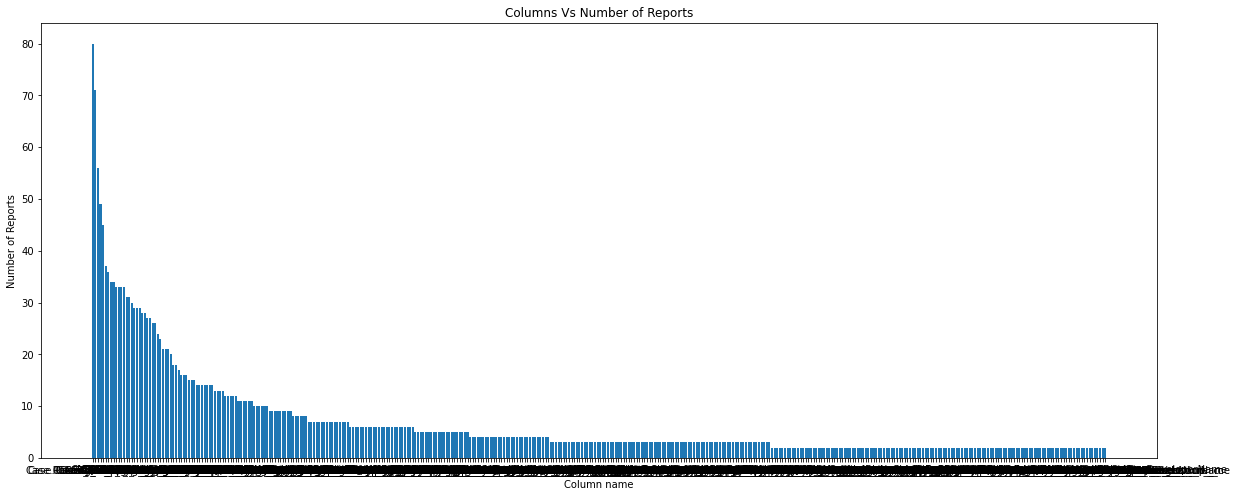

In [10]:
plt.figure(figsize=(20,8))
plt.bar(columns_more_than_one.keys(), columns_more_than_one.values())
plt.title('Columns Vs Number of Reports')
plt.xlabel('Column name')
plt.ylabel('Number of Reports')
plt.show()

Let's build a TOP 10 columns that are used the most

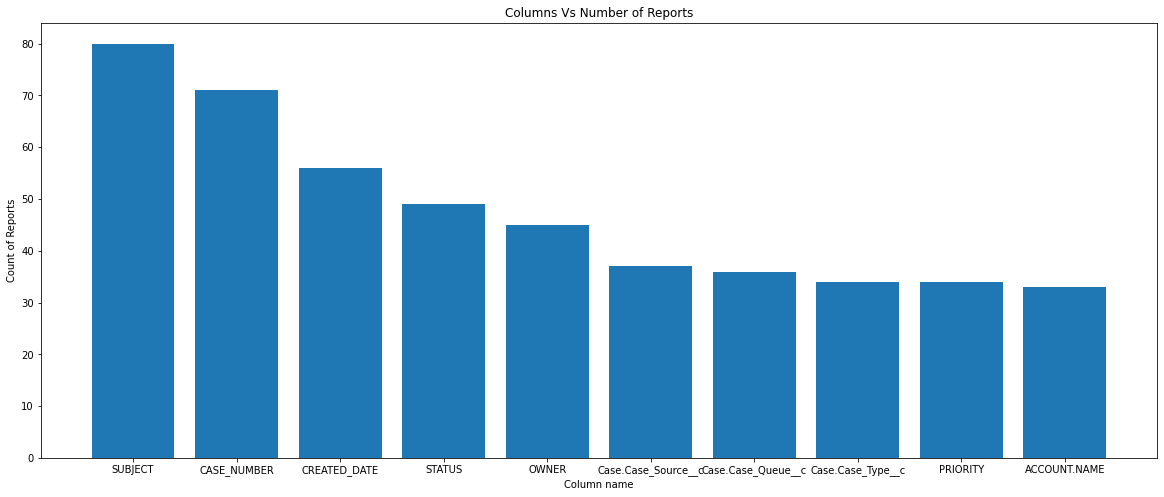

In [11]:
top_10_count = dict(list(columns_more_than_one.items())[:10])

plt.figure(figsize=(20,8))
plt.bar(top_10_count.keys(), top_10_count.values())
plt.title('Columns Vs Number of Reports')
plt.xlabel('Column name')
plt.ylabel('Count of Reports')
plt.show()

You can see that the column `SUBJECT` is being used in 80 reports

Now, let's see the amount of columns that are used in more than one report versus the amount of columns that are used in only one

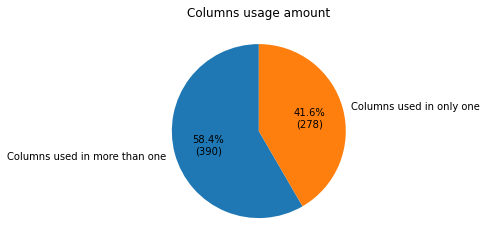

In [13]:
m_t_one = 0
one = 0

for header, ids in columns_usage.items():
    if len(ids) > 1:
        m_t_one += 1
    else: one += 1


def calc_pct(pct, sizes):
    total = sum(sizes)
    absolute = round((pct / 100)*total)
    return "{:.1f}%\n({:d})".format(pct, absolute)
        
labels = 'Columns used in more than one', 'Columns used in only one'
sizes = [m_t_one, one]

fig1, ax1 = plt.subplots()
ax1.set(aspect="equal", title='Columns usage amount')
ax1.pie(sizes, labels=labels, autopct=lambda pct: calc_pct(pct, sizes), startangle=90)

plt.show()

Almost 60% of the columns are being used in more than one report. 